In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization, Conv2D, MaxPooling2D
import numpy as np

/home/eduardo/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_images = pd.read_csv('../housenumbers/train_images.csv').drop('filename', axis=1).astype('float32')
train_labels = pd.read_csv('../housenumbers/train_labels.csv').drop('filename', axis=1).astype('int16')

test_images = pd.read_csv('../housenumbers/test_images.csv').drop('filename', axis=1).astype('float32')
test_labels = pd.read_csv('../housenumbers/test_labels.csv').drop('filename', axis=1).astype('int16')

extra_images = pd.read_csv('../housenumbers/extra_images.csv').drop('filename', axis=1).astype('float32')
extra_labels = pd.read_csv('../housenumbers/extra_labels.csv').drop('filename', axis=1).astype('int16')

In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape, extra_images.shape, extra_labels.shape

((13000, 1024), (13000, 5), (6000, 1024), (6000, 5), (13000, 1024), (13000, 5))

In [4]:
train_images.iloc[:10,:10]

,0,1,2,3,4,5,6,7,8,9
0,0.352349,0.366906,0.373620,0.360278,0.330929,0.309424,0.293906,0.297059,0.304902,0.312745
1,0.754941,0.726082,0.680365,0.628380,0.572475,0.520447,0.486898,0.469718,0.449831,0.429498
2,0.180714,0.192925,0.204243,0.226600,0.233271,0.227729,0.225663,0.221294,0.218545,0.215796
3,0.884024,0.884024,0.876180,0.864416,0.852651,0.833043,0.793102,0.750412,0.706549,0.675624
4,0.352416,0.351690,0.358639,0.368573,0.373008,0.392616,0.414012,0.412047,0.390263,0.397894
5,0.671937,0.669145,0.678161,0.686451,0.692675,0.693122,0.689200,0.745722,0.826902,0.838667
6,0.345863,0.345863,0.345863,0.341941,0.334545,0.328322,0.323227,0.317004,0.309161,0.305239
7,0.337051,0.347600,0.352651,0.354227,0.361792,0.371702,0.368227,0.348620,0.322063,0.306098
8,0.069988,0.078961,0.087933,0.076573,0.104961,0.176400,0.213761,0.218576,0.212353,0.196667
9,0.198686,0.189714,0.177267,0.171937,0.177200,0.194910,0.216988,0.235145,0.239961,0.259290


In [5]:
extra_images.iloc[:10,:10]

,0,1,2,3,4,5,6,7,8,9
0,0.857800,0.857800,0.853878,0.843733,0.848102,0.845800,0.846078,0.846525,0.847698,0.846078
1,0.300451,0.338773,0.371553,0.384278,0.404569,0.421384,0.434278,0.426435,0.391141,0.344082
2,0.263635,0.266596,0.236608,0.205769,0.195455,0.208671,0.224592,0.230282,0.253278,0.246075
3,0.347216,0.349518,0.347898,0.348624,0.347047,0.343573,0.338243,0.334769,0.324859,0.303184
4,0.235149,0.236043,0.234914,0.230949,0.229776,0.231843,0.231565,0.228816,0.235039,0.234635
5,0.081110,0.113039,0.163639,0.196251,0.207569,0.208910,0.192306,0.172016,0.160953,0.152427
6,0.065741,0.070110,0.060243,0.066298,0.123098,0.174078,0.185118,0.166125,0.118788,0.080188
7,0.389129,0.381286,0.364706,0.364259,0.376749,0.388514,0.385039,0.391027,0.384314,0.377365
8,0.459165,0.459847,0.450831,0.444565,0.443224,0.427090,0.407482,0.415773,0.457055,0.467690
9,0.404784,0.419788,0.441506,0.458129,0.440098,0.427161,0.449475,0.441098,0.444486,0.427863


In [6]:
train_labels.head()

,0,1,2,3,4
0,10,10,10,3,5
1,10,10,10,1,5
2,10,10,10,2,9
3,10,10,10,10,5
4,10,10,10,3,6


In [7]:
train_images = pd.concat([train_images, extra_images])
train_labels = pd.concat([train_labels, extra_labels])

In [8]:
num_classes = 11
img_rows, img_cols = 32, 32
batch_size = 128
kernel_size = 5
depth1 = 48
depth2 = 64
depth3 = 80
depth4 = 96
depth5 = 128
depth6 = 128
kernel_size = (3,3)
pool_size=(2, 2)
pad_type = 'same'
strides = [1, 2]

Labels firs image: [10 10 10  3  5]


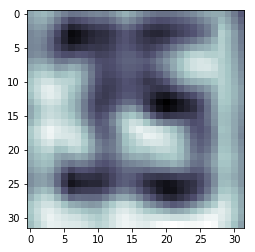

In [9]:
print("Labels firs image: {}".format(train_labels.iloc[0,:].values))
plt.imshow(train_images.iloc[0,:].values.reshape(img_rows, img_cols), cmap=plt.cm.bone)

Labels last image: [10 10 10  5  6]


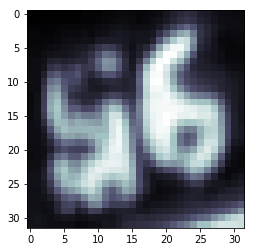

In [10]:
print("Labels last image: {}".format(train_labels.iloc[train_labels.shape[0]-1,:].values))
plt.imshow(train_images.iloc[train_labels.shape[0]-1,:].values.reshape(img_rows, img_cols), cmap=plt.cm.bone)

In [11]:
x_train = train_images.values.reshape(train_images.shape[0], img_rows, img_cols, 1)
x_test = test_images.values.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)
y_train = [y_train[:, i] for i in range(5)]
y_test = [y_test[:, i] for i in range(5)]

In [12]:
x_train.shape, x_test.shape

((26000, 32, 32, 1), (6000, 32, 32, 1))

In [14]:
#kaggle model
model_input = Input(shape=(32, 32, 1))
x = BatchNormalization()(model_input)
        
x = Conv2D(32, (3, 3), activation='relu', padding='same')(model_input)
x = MaxPooling2D(pool_size=(2, 2))(x) 
    
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)    
x = Dropout(0.25)(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)       
x = Conv2D(64, (3, 3), activation='relu')(x)    
x = Dropout(0.25)(x)
    
x = Conv2D(128, (3, 3), activation='relu')(x)    
x = Dropout(0.25)(x)
              
x = Flatten()(x)
    
x = Dense(512, activation='relu')(x)    
x = Dropout(0.5)(x)
    
y1 = Dense(11, activation='softmax')(x)
y2 = Dense(11, activation='softmax')(x)
y3 = Dense(11, activation='softmax')(x)
y4 = Dense(11, activation='softmax')(x)
y5 = Dense(11, activation='softmax')(x)
    
model = Model(input=model_input, output=[y1, y2, y3, y4, y5])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), 
               epochs=50, batch_size=batch_size, verbose=0)

/home/eduardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


In [15]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("accurracy of digits: {}".format(scores[-5:]))

accurracy of digits: [0.9998333333333334, 0.991, 0.9415, 0.8775, 0.8606666666666667]


In [16]:
probas = model.predict(np.array([x_test[1500]]))
classes = []
for array in probas:
    classes.append(array.argmax())
classes

[10, 10, 10, 8, 9]

Labels last test image: [10 10 10  8  9]


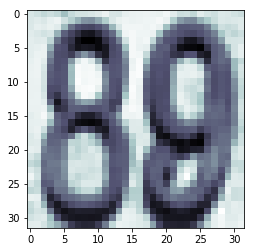

In [17]:
print("Labels last test image: {}".format(test_labels.iloc[1500,:].values))
plt.imshow(test_images.iloc[1500,:].values.reshape(img_rows, img_cols), cmap=plt.cm.bone)

In [18]:
#paper model
inputs = Input(shape = input_shape)

x = Conv2D(filters=depth1, kernel_size=kernel_size, padding=pad_type, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides = (strides[1], strides[1]))(x)
x = Dropout(0.25)(x)

x = Conv2D(filters=depth2, kernel_size=kernel_size, padding=pad_type, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

x = Conv2D(filters=depth3, kernel_size=kernel_size, padding=pad_type, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides = (strides[0], strides[0]))(x)
x = Dropout(0.25)(x)

x = Conv2D(filters=depth4, kernel_size=kernel_size, padding=pad_type, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides = (strides[1], strides[1]))(x)
x = Dropout(0.25)(x)

x = Conv2D(filters=depth5, kernel_size=kernel_size, padding=pad_type, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides = (strides[0], strides[0]))(x)
x = Dropout(0.25)(x)

x = Conv2D(filters=depth6, kernel_size=kernel_size, padding=pad_type, activation='relu')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Flatten(name="feature_vector")(x)

y1 = Dense(11, activation='softmax')(x)
y2 = Dense(11, activation='softmax')(x)
y3 = Dense(11, activation='softmax')(x)
y4 = Dense(11, activation='softmax')(x)
y5 = Dense(11, activation='softmax')(x)

model = Model(input=inputs, output = [y1, y2, y3, y4, y5])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), 
               epochs=100, batch_size=batch_size, verbose=0)

/home/eduardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


In [19]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("accurracy of digits: {}".format(scores[-5:]))

accurracy of digits: [0.9998333333333334, 0.9963333333333333, 0.9726666666666667, 0.9398333333333333, 0.9268333333333333]
